In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
# Perceptron algorithm

class Perceptron(object):
    """
    Parameters
    ----------
    lr: float
        learning rate ([0.0:1.0])
    n_iter: int
        passes over the training dataset
        
    Attributes
    ----------
    w_:1d array
        weights after fitting
    errors_:list
        number of misclassifications in every epoch
    """
    def __init__(self, lr=0.01, n_iter=10):
        self.lr=lr
        self.n_iter=n_iter
        
    def fit(self, X, y):
        """
        Fit training data
        :param X:array-like, shape=[n_samples,n_features]
            Training vectors, where n_samples
            is the number of samples and n_features
            is the number of features.          
        :param y: array-like, shape=[n_samples]
            Target values
        :return: self:object
        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):  # loop n_iter times ((of looping over all samples*)
            errors = 0
            for xi, target in zip(X,y):  # iterate through each sample & true label (each sample gets one vote)
                update = self.lr * (target - self.predict(xi))  # calc delta w (0 if true label and prediction is same)
                self.w_[1:] += update * xi  # x_i: vector. All w_j except w_0 updated at once
                self.w_[0] += update  # w_0 acts as bias. Threshold is 0. (Bias cancels out lin comb of x_i & w)
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """Calc net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """ Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)  # get label of data
                

In [29]:
# get data from sklearn.datasets
iris = datasets.load_iris()

In [30]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [31]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [32]:
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])

In [33]:
df['label']=iris['target']

In [34]:
# only select linearly separable data: setosa and vesicolor
df = df[(df['label']==0) | (df['label']==1)]

In [35]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [47]:
# change target from int to name of label

# def int_to_name(x):
#     if x == 0:
#         return 'setosa'
#     elif x == 1:
#         return 'versicolor'
#     else:
#         return 'virginica'
#     
# df['label'] = df['label'].apply(int_to_name)

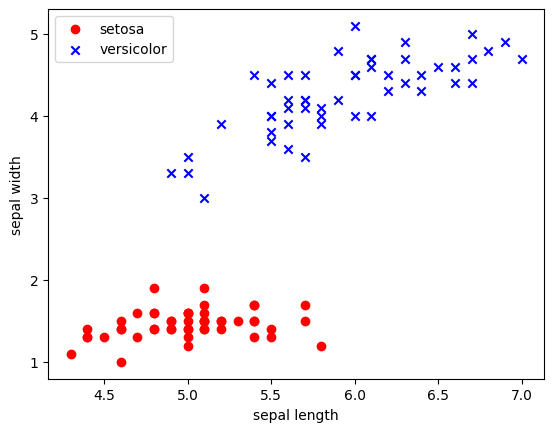

In [36]:
y = df.iloc[0:100, 4].to_numpy()
y = np.where(y==0,-1,1)
X = df.iloc[0:100, [0,2]].to_numpy()

# plotting (only use 2 features: sepal length & sepal width)
plt.scatter(X[:50,0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100,0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend(loc='upper left')
plt.show()


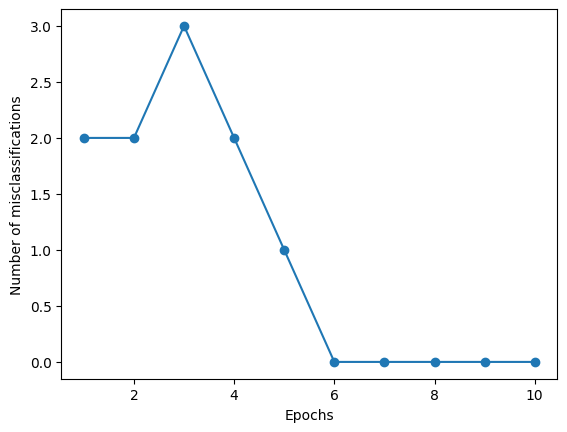

In [214]:
model = Perceptron(lr=0.01, n_iter=10)
model.fit(X,y)

plt.plot(range(1,len(model.errors_)+1), model.errors_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

In [37]:
# visualizing decision boundaries
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # marker generator & color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')[:len(np.unique(y))]
    
    # plot decision boundary
    x1_min, x1_max = X[:,0].min() -1, X[:,0].max() +1
    x2_min, x2_max = X[:,1].min() -1, X[:,1].max() +1
    
    # make sample points from min to max using np.meshgrid()
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    # z contains labels for all samples generated using meshgrid.
    # The reason why we use contourf(); z axis value is label value.
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)   
    
    plt.contourf(xx1, xx2, z, alpha=0.2, colors=colors)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx],label=cl)
    

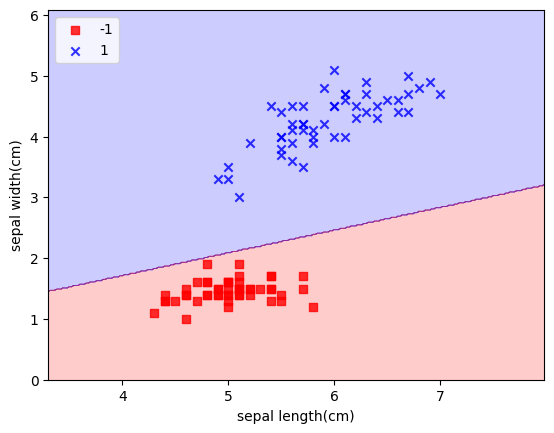

In [239]:
plot_decision_regions(X, y, classifier=model)
plt.xlabel('sepal length(cm)')
plt.ylabel('sepal width(cm)')
plt.legend(loc='upper left')
plt.show()


In [241]:
# Adaptive linear neuron (Adaline)
# Change Perceptron learning algorith's fit() method 
# cost = sum of squared errors (SSE) b/t prediction and true label

class AdalineGD(object):
    """
    Parameters
    ----------
    lr: float
        learning rate ([0.0:1.0])
    n_iter: int
        passes over the training dataset
        
    Attributes
    ----------
    w_:1d array
        weights after fitting
    errors_:list
        number of misclassifications in every epoch
    """
    def __init__(self, lr=0.01, n_iter=10):
        self.lr=lr
        self.n_iter=n_iter
        
    def fit(self, X, y):
        """
        Fit training data
        :param X:array-like, shape=[n_samples,n_features]
            Training vectors, where n_samples
            is the number of samples and n_features
            is the number of features.          
        :param y: array-like, shape=[n_samples]
            Target values
        :return: self:object
        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for _ in range(self.n_iter):  # loop n_iter times
            output = self.net_input(X)
            errors = (y - output)  # errors == vector
            self.w_[1:] += self.lr * X.T.dot(errors)  # delta_w = lr * gradient(hessian)
            self.w_[0] += self.lr * errors.sum()  # for w_0, x_0 is vector of ones
            
            cost = (errors**2).sum() / 2.0  # calc cost after updating to track performance
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """
        Calc net input
        == linear combination X
        """
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        """Calc linear activation"""
        return self.net_input(X)
    
    def predict(self, X):
        """ Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)  # get label of data

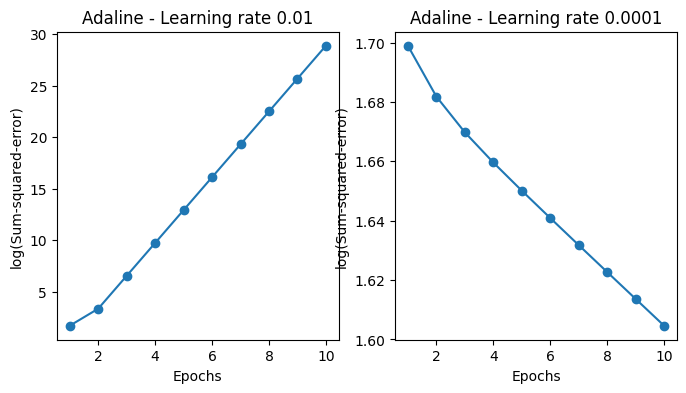

In [242]:
# make 2 plots using plt.subplots()
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))

model1 = AdalineGD(n_iter=10, lr=0.01).fit(X,y) 
ax[0].plot(range(1,len(model1.cost_)+1), np.log10(model1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

model2 = AdalineGD(n_iter=10, lr=0.0001).fit(X,y) 
ax[1].plot(range(1,len(model2.cost_)+1), np.log10(model2.cost_), marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Sum-squared-error)')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

In [38]:
# Gradient descent performs better when data is standardized
X_std = np.copy(X)
X_std[:,0] = (X[:,0]-X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1]-X[:,1].mean()) / X[:,1].std()

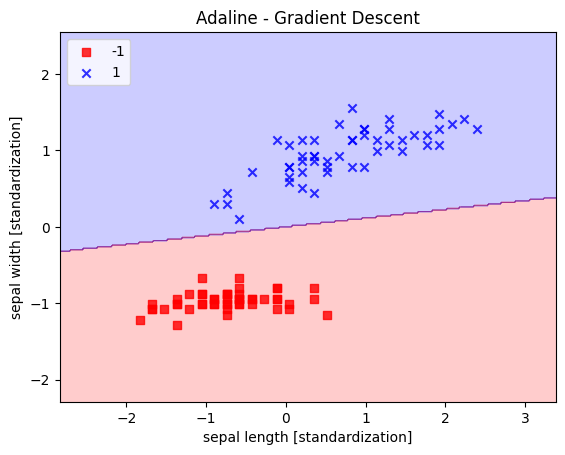

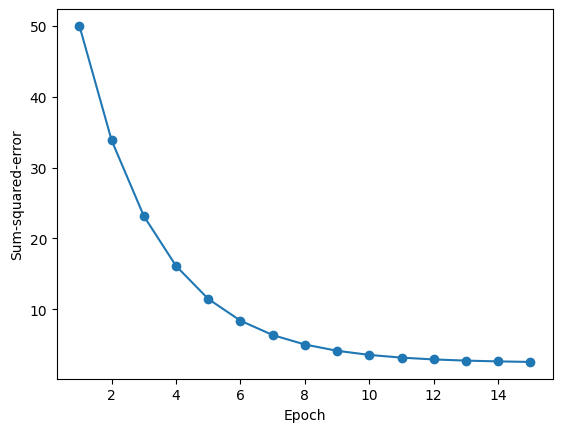

In [244]:
model3 = AdalineGD(n_iter=15, lr=0.01)
model3.fit(X_std,y)

plot_decision_regions(X_std, y , classifier=model3)
plt.title("Adaline - Gradient Descent")
plt.xlabel("sepal length [standardization]")
plt.ylabel("sepal width [standardization]")
plt.legend(loc='upper left')
plt.show()

plt.plot(range(1,len(model3.cost_)+1),model3.cost_,marker='o')
plt.xlabel("Epoch")
plt.ylabel("Sum-squared-error")
plt.show()

In [58]:
# Adaline Stochastic Gradient Descent (SGD)
from numpy.random import seed

class AdalineSGD(object):
    """
    Parameters
    ----------
    lr: float
        learning rate ([0.0:1.0])
    n_iter: int
        passes over the training dataset
        
    Attributes
    ----------
    w_:1d array
        weights after fitting
    errors_:list
        number of misclassifications in every epoch
    shuffle: bool (default: True)
        shuffles training data every epoch if True
        to prevent cycles.
    random_state: int (default:None)
        Set random state for shuffling
        and initializing the weights.
    """
    def __init__(self, lr=0.01, n_iter=10,shuffle=True,random_state=None):
        self.lr=lr
        self.n_iter=n_iter
        self.w_initialized=False
        self.shuffle=shuffle
        if random_state:
            seed(random_state)
        
    def fit(self, X, y):
        """
        Fit training data
        :param X:array-like, shape=[n_samples,n_features]
            Training vectors, where n_samples
            is the number of samples and n_features
            is the number of features.          
        :param y: array-like, shape=[n_samples]
            Target values
        :return: self:object
        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        
        for _ in range(self.n_iter):  # loop n_iter times
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost=[]
            for xi, target in zip(X,y):
                cost.append(self._update_weights(xi, target)) # update using one sample at a time
            avg_cost = sum(cost)/len(y)  # calc cost by averaging all costs that came from  each sample
            self.cost_.append(avg_cost)
        return self
    
    def partial_fit(self, X, y):
        """
        Fit training data without reinitializing the weights
        (Online learning)
        """
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        
        # need to use ravel() in case y[idx] is used. ravel() makes it into np.array instead of leaving it as element value (integer).
        if y.ravel().shape[0] >1:  
            for xi, target in zip(X,y): # loop through partial/new samples
                self._update_weights(xi, target)
        else:
            self._update_weights(X,y)  # when running this with one sample
        return self
    
    def _shuffle(self,X,y):  # single underscore means the func/obj is used internally within class  
        """Shuffle training data"""
        r = np.random.permutation(len(y))  # random permutation of numbers with range: [0:len(y)]
        return X[r],y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to zeros"""
        self.w_ = np.zeros(1+m)
        self.w_initialized = True
    
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.net_input(xi)
        error = (target - output)
        self.w_[1:] += self.lr * xi.dot(error)
        self.w_[0] += self.lr * error
        cost = 0.5 * error**2
        return cost
            
    def net_input(self, X):
        """
        Calc net input
        == linear combination X
        """
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        """Calc linear activation"""
        return self.net_input(X)
    
    def predict(self, X):
        """ Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)  # get label of data

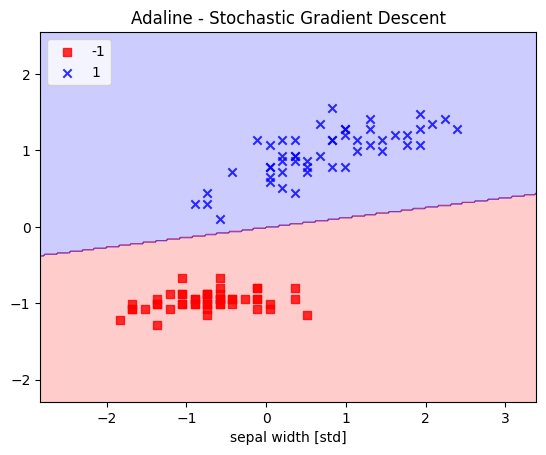

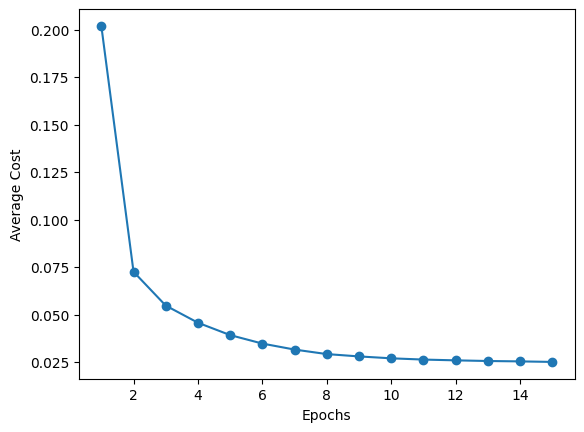

In [59]:
ada_sgd = AdalineSGD(n_iter=15, lr=0.01, random_state=1)
ada_sgd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [std]')
plt.xlabel('sepal width [std]')
plt.legend(loc='upper left')
plt.show()

plt.plot(range(1,len(ada_sgd.cost_)+1), ada_sgd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.show()


In [60]:
ada_sgd.partial_fit(X_std[0,:],y[0])

y.ravel().shape[0] 1
y -1


In [55]:
a = np.array([1])
a.ravel()

array([1])

In [64]:
y[0].shape

()

In [57]:
y[0]

-1